In [ ]:
import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'

ubfs = np.array([])
relations = []
for relation, relation_name in zip(['LX-T', 'YSZ-T', 'M-T'], 
                                   ['$L_\\mathrm{{X}}-T$',
                                    '$Y_\\mathrm{{SZ}}-T$',
                                    '$M_\\mathrm{{gas}}-T$']):
    ubf_list = []
    for lc in range(1728):
        lc00 = f'{lc:04d}'

        filename = f'{data_dir}/lc{lc00}/bf_mcmc.csv'

        if os.path.exists(filename):
            df = pd.read_csv(filename)
            if np.sum((df['scaling_relation']==relation) & (df['zmax']==0.1)) > 0:
                ubf = df[(df['scaling_relation']==relation) & (df['zmax']==0.1)]['ubf'].values[0]
                ubf_list.append(ubf)
        else:
            continue

    ubfs = np.concatenate((ubfs, np.array(ubf_list)))
    relations += [relation_name for i in range(len(ubf_list))] 

    print(len(ubf_list))

In [7]:
data = pd.DataFrame({
    '$u_\\mathrm{{bf}}$ (km/s)': ubfs,
    'Relations': relations
})

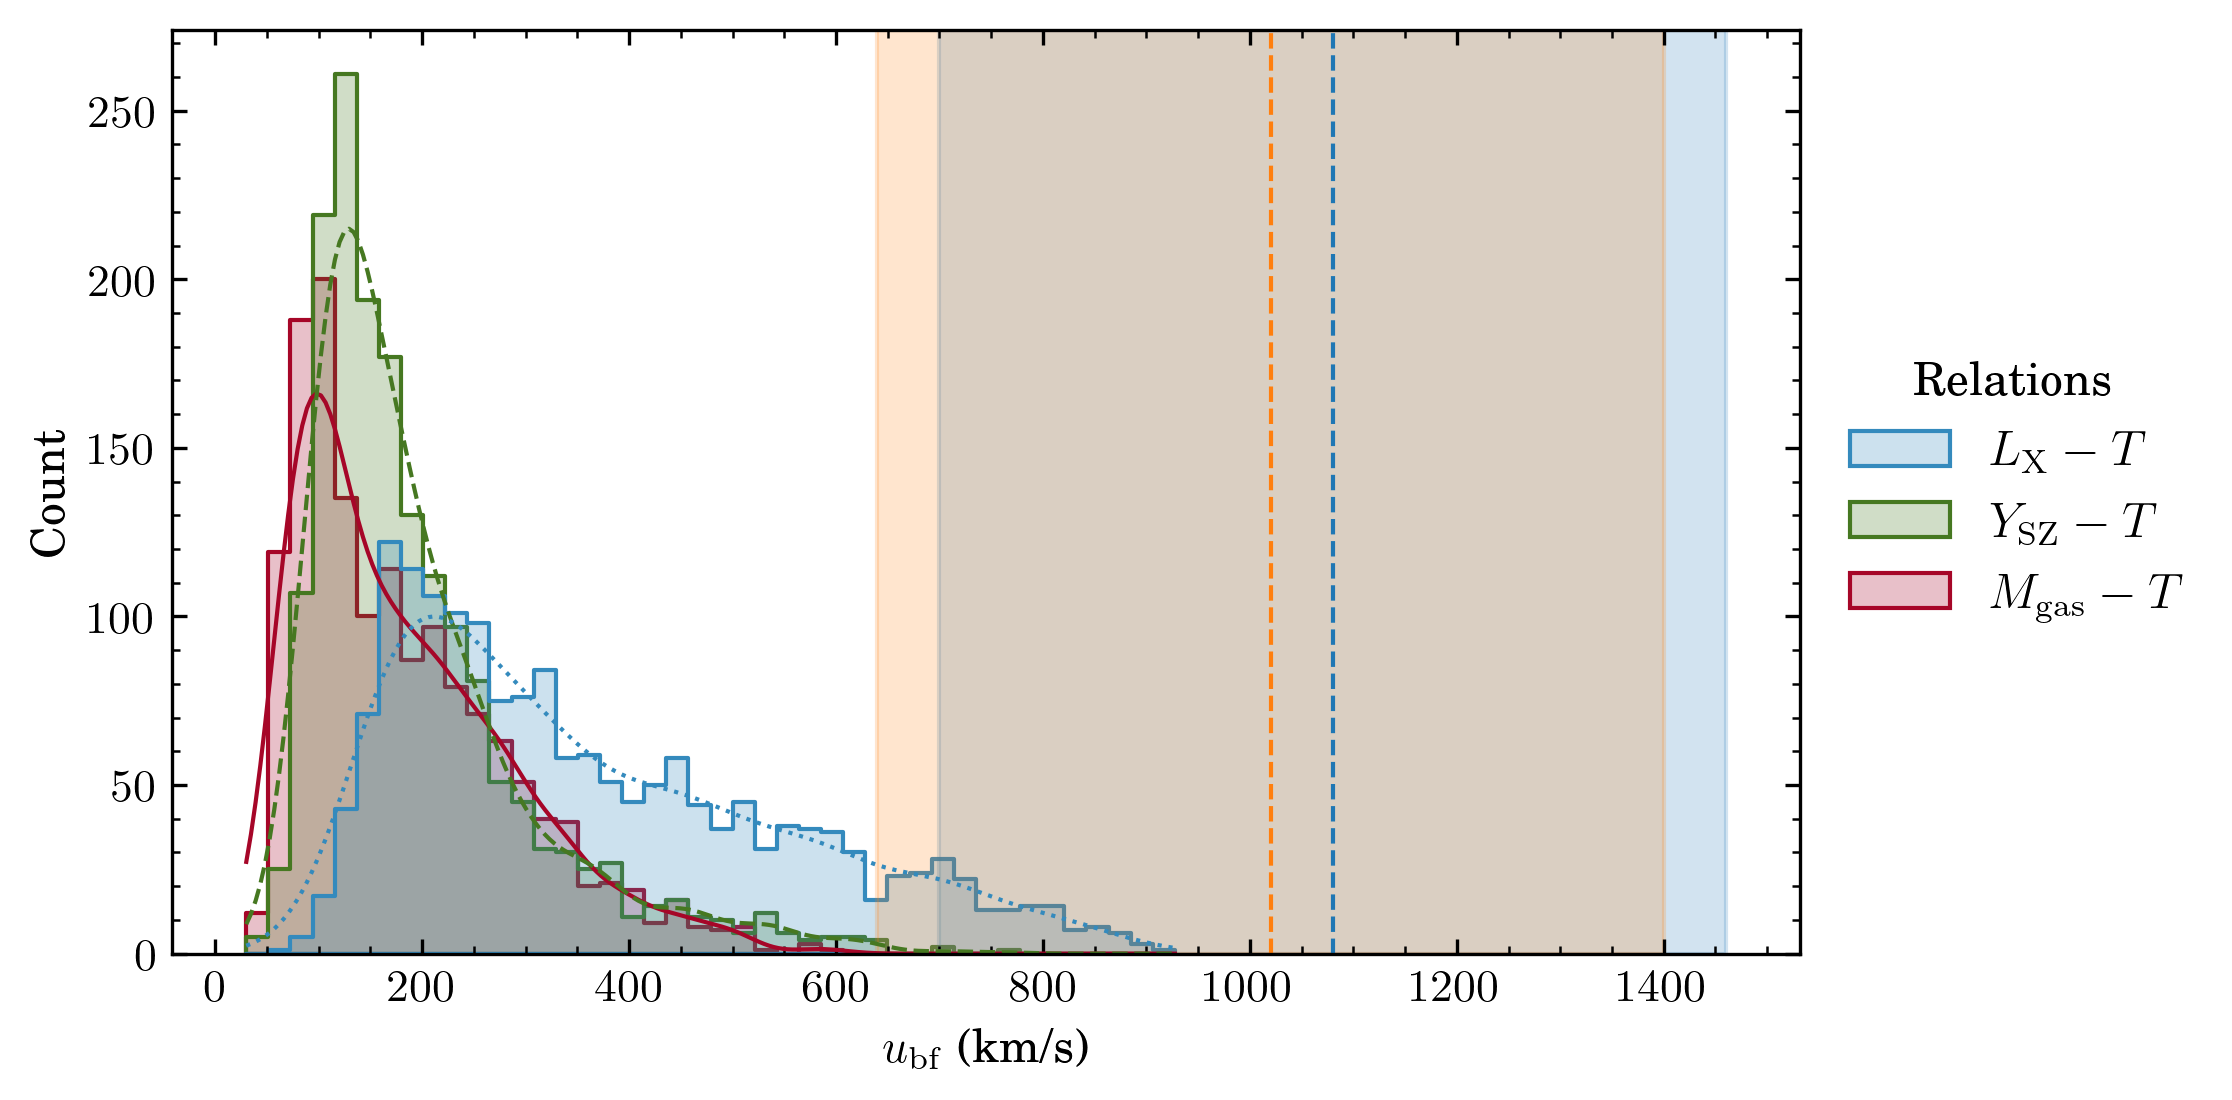

In [8]:
import matplotlib.pyplot as plt
plt.style.use('./nice.mplstyle')
import seaborn as sns
plt.figure(figsize=(7, 4), dpi=300)
g = sns.histplot(data, x='$u_\\mathrm{{bf}}$ (km/s)', hue='Relations', kde=True, element='step')

g.axvline(x=1080, color='tab:blue', linestyle='--')
g.axvline(x=1020, color='tab:orange', linestyle='--')
g.axvspan(xmin=1080-380, xmax=1080+380, color='tab:blue', alpha=0.2)
g.axvspan(xmin=1020-380, xmax=1020+380, color='tab:orange', alpha=0.2)
sns.move_legend(g, "center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Make ubf_z plot

In [ ]:
import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'



dict = {}
for lc in range(1728):
    lc00 = f'{lc:04d}'

    filename = f'{data_dir}/lc{lc00}/bf_mcmc.csv'

    # check if file exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)

        # save to df
        if 'ubf' not in list(dict.keys()):  # dict.keys() is of type dict_keys
            for key in df.keys():           # load all data
                dict[key] = df[key]

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.full(length, lc)
        else:
            for key in df.keys():           # load all data
                dict[key] = np.concatenate((dict[key], df[key]))

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.concatenate((dict['Lightcone'], np.full(length, lc)))

    else:
        print(lc00, 'bf_mcmc.csv not found.')
        continue
    
data = pd.DataFrame(dict)
# data.to_csv('../data/analysis_all/bf_mc_all.csv')
data

In [4]:
# save data
data.to_csv('../data/analysis_all/bf_mc_all.csv')

## Read and plot

LX-T at zmax=0.07: 314.88768563157896 +262.39489639998783 -131.3537759981865 km/s
LX-T at zmax=0.1: 314.73950155236986 +259.7060277813841 -131.0118680048529 km/s
LX-T at zmax=0.13: 313.1564682257744 +262.57013470855094 -129.7090543583569 km/s
YSZ-T at zmax=0.07: 163.99714318902227 +118.6056363878115 -55.68537277657053 km/s
YSZ-T at zmax=0.1: 164.33609123717542 +118.65456416057867 -55.91371625484898 km/s
YSZ-T at zmax=0.13: 163.895379699088 +116.53320079527336 -55.80247852612186 km/s
M-T at zmax=0.07: 157.5077196502166 +128.52380846302793 -72.71431992205352 km/s
M-T at zmax=0.1: 158.06434517365443 +129.77316252001322 -73.07827578306046 km/s
M-T at zmax=0.13: 157.78519608659877 +129.7789797207148 -72.2217664003085 km/s


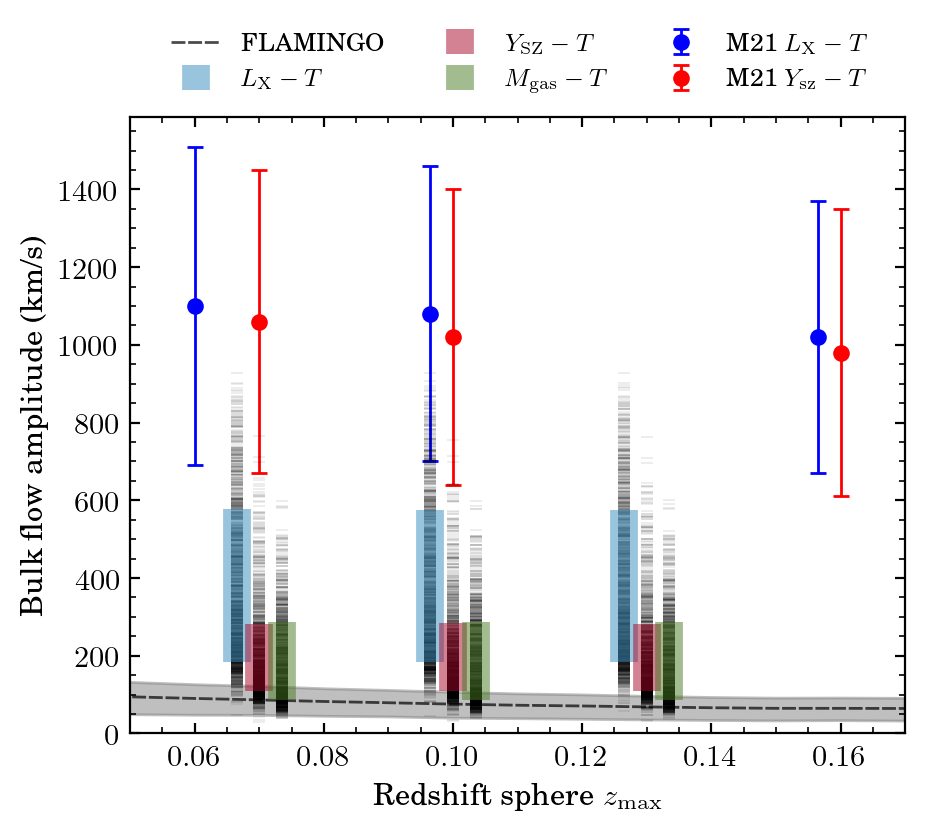

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools')
import clusterfit as cf
plt.style.use('./nice.mplstyle')

# Assuming 'data' is the DataFrame created from the previous code
# Define the scaling relations and their colors
scaling_relations = ['LX-T', 'YSZ-T', 'M-T']
colors = ['#348ABD', '#A60628', '#467821',]
offsets = [-0.0035, 0, 0.0035]  # Small offsets for each relation

plt.figure(figsize=(5, 4), dpi=200)

import pandas as pd
data = pd.read_csv('../data/analysis_all/bf_mc_all.csv') # read main bulk flow data


# Plot for each scaling relation
for relation, color, offset in zip(scaling_relations, colors, offsets):
    # Filter data for the current scaling relation
    relation_data = data[data['scaling_relation'] == relation]
    
    # Apply offset to zmax
    zmax_offset = relation_data['zmax'] + offset
    
    # Plot individual data points with error bars
    plt.errorbar(
        x=zmax_offset,
        y=relation_data['ubf'],
        yerr=[relation_data['ubf_err_lower'], relation_data['ubf_err_upper']],
        fmt='_',
        ecolor=color,
        capsize=0,
        elinewidth=0,
        markeredgewidth=0.1,
        markeredgecolor='black',
        markersize=4,
        alpha=0.5,
    )
    
    # Calculate the error range
    for z in relation_data['zmax'].unique():
        z_data = relation_data[relation_data['zmax'] == z]
        upper = np.percentile(z_data['ubf'], 84)
        lower = np.percentile(z_data['ubf'], 16)
        median = np.median(z_data['ubf'].values)

        # Print out the cross region ranges
        print(f'{relation} at zmax={z}: {median} +{upper - median} -{median - lower} km/s')

        # Plot the cross region as bars
        plt.errorbar(
            x=[z + offset],
            y=[(upper + lower) / 2],
            yerr=[[(upper - lower) / 2], [(upper - lower) / 2]],
            fmt='none',
            ecolor=color,
            #capsize=5,
            #capthick=1,
            elinewidth=10,
            alpha=0.5,
            zorder=10,
            label=f'{cf.latex_relation(relation)}' if z==0.07 else ''
        )

# M21 results
plt.errorbar(x=np.array([0.06 - offsets[0], 0.1, 0.16]) + offsets[0], 
             y=[1100, 1080, 1020], 
             yerr=[410, 380, 350], 
             label='M21 $L_\mathrm{X}-T$', 
             fmt='o', 
             color='blue', 
             capsize=3,
             capthick=1
             )
plt.errorbar(x=[0.07, 0.1, 0.16], 
             y=[1060, 1020, 980], 
             yerr=[390, 380, 370], 
             label='M21 $Y_\mathrm{sz}-T$', 
             fmt='o', 
             color='red', 
             capsize=3,
             capthick=1
             )

# Plot the underlying truth
df = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/bf_truth.csv')
plt.fill_between(x=df['z'].values, 
                 y1=(df['ubf']-df['ubf_low_err']).values,
                 y2=(df['ubf_up_err']+df['ubf']).values,
                 color='grey',
                 alpha=0.5,
                 zorder=0)
plt.plot(df['z'].values, 
         df['ubf'].values, 
         color='black', 
         alpha=0.7, 
         zorder=0,
         label='FLAMINGO'
         )

plt.xlim(0.05, 0.17)
plt.ylim(bottom=0)
plt.xlabel('Redshift sphere $z_\mathrm{max}$')
plt.ylabel('Bulk flow amplitude (km/s)')
plt.legend(fontsize=9, bbox_to_anchor=(0.5, 1), loc='lower center', ncol=3)

plt.savefig('./to_paper/bulk_flow.png', bbox_inches='tight')
plt.show()

## One dimensional p-value and significance

In [11]:
import math
from scipy.special import erfinv
import numpy as np
# Lx-T z<0.10
nsig1 = (1080 - 315) / (260**2 + 380**2)**0.5
print(nsig1)
p1 = 1 - math.erf(nsig1/np.sqrt(2))
print(p1)

# Ysz-T z<0.10
nsig2 = (1020 - 164) / (119**2 + 380**2)**0.5
print(nsig2)
p2 = 1 - math.erf(nsig2/np.sqrt(2))
print(p2)

# Joint value
p = p1*p2
print(p)
nsig = np.sqrt(2) * erfinv(1 - p)
print(nsig)

1.6614738285687403
0.09661832091281275
2.149688715113693
0.03157984568353245
0.0030511916646286425
2.9625329339178634


In [18]:
import math
from scipy.special import erfinv
import numpy as np
# Lx-T z<0.06
nsig1 = (1100 - 315) / (262**2 + 410**2)**0.5
print(nsig1)
p1 = 1 - math.erf(nsig1/np.sqrt(2))
print(p1)

# Ysz-T z<0.07
nsig2 = (1060 - 164) / (119**2 + 390**2)**0.5
print(nsig2)
p2 = 1 - math.erf(nsig2/np.sqrt(2))
print(p2)

# Joint value
p = p1*p2
print(p)
nsig = np.sqrt(2) * erfinv(1 - p)
print(nsig)

1.6133558426410304
0.1066672207887962
2.1974186973581684
0.027990557146471473
0.00298567493914409
2.969208955824517


## Contours

In [2]:
import pandas as pd
data = pd.read_csv('../data/analysis_all/bf_mc_all.csv') # read main bulk flow data

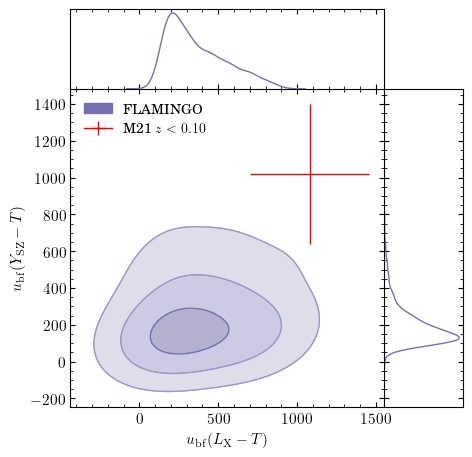

In [9]:
# ---------------------------------------------------------------------------- #
#                                Plot for print                                #
# ---------------------------------------------------------------------------- #ß
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('./nice.mplstyle')

contour_color='#7570b3'

zmax = 0.10
xrelation = 'LX-T'
xmask = (data['scaling_relation'] == xrelation) & (data['zmax'] == zmax)
xdata = data[xmask]['ubf']
yrelation = 'YSZ-T'
ymask = (data['scaling_relation'] == yrelation) & (data['zmax'] == zmax)
ydata = data[ymask]['ubf']



# Create the 2D KDE plot
g = sns.JointGrid(x=xdata.values,
                  y=ydata.values,
                  space=0,
                  ratio=4,
                  # marginal_ticks=True,
                  height=4.5,
                  # dpi=300
                  )
g.plot_joint(sns.kdeplot,  # contours
             fill=False, 
             levels=(0.011, 0.14, 0.61, 1.),
             bw_adjust=3,
             zorder=1,
             color=contour_color,
             # cut=2
             )
g.plot_joint(sns.kdeplot,  # filled contours
             fill=True, 
             levels=(0.011, 0.14, 0.61, 1.),
             bw_adjust=3,
             alpha=0.5,
             zorder=2,
             color=contour_color,
             # cut=2
             )
g.plot_marginals(sns.kdeplot,
                 fill=False,
                 color=contour_color,
                 )

# g.ax_marg_x.set_yscale('log')
# g.ax_marg_y.set_xscale('log')

# M21 results
x_point = 1080
y_point = 1020
# g.refline(x=x_point, y=y_point, linestyle='dashdot', color=contour_color, zorder=3)
erb = g.ax_joint.errorbar(x=1080, 
                    y=1020,
                    xerr=380,
                    yerr=380, 
                    fmt='',
                    color='red', 
                    label='M21 $z<0.10$', 
                    zorder=10)
# g.ax_joint.errorbar(x=75, y=75,
#                     xerr=[[36], [30]],
#                     yerr=[[36], [30]],
#                     fmt='',
#                     color='blue', 
#                     label='Truth $z<0.10$', 
#                     zorder=10)

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# matplotlib doesn't detect the contour correctly, adding it manually
import matplotlib.patches as mpatches
contour = mpatches.Patch(color=contour_color, label='FLAMINGO')

# Add to the legend
g.ax_joint.legend(handles=[contour, erb], loc='upper left', fontsize=10)

g.set_axis_labels(xlabel='$u_\mathrm{bf} (L_\mathrm{X}-T)$', ylabel='$u_\mathrm{bf} (Y_\mathrm{SZ}-T)$')
plt.savefig('./to_paper/bfmc_hist_LTYTMT.pdf', bbox_inches='tight')
# Show the plot
plt.show()